In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from copy import deepcopy
##
from lib import my_draw_networkx_edge_labels

Dataset: Graph-type = {'directed', 'undirected', 'adjaceccy-matrix', 'randomize', 'Euclide'}

In [ ]:
G1 = nx.read_gml("./dataset/complete_graph_undirected.gml")
G1.adj

In [ ]:
plt.figure(figsize=(10,6))
pos = nx.spring_layout(G1, seed=7) ## seed=7
## draw nodes
nx.draw_networkx_nodes(G1, pos, node_size = 500)
## draw node labels
nx.draw_networkx_labels(G1, pos)
## draw edges
arc_rad = 0.1
edge_list = [edge for edge in G1.edges(data=True)]
nx.draw_networkx_edges(G1, pos, edgelist = edge_list)
# edge distance labels
edge_labels = nx.get_edge_attributes(G1, "d")
print(edge_labels)
nx.draw_networkx_edge_labels(G1, pos, edge_labels = edge_labels)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

In [11]:
G1.nodes, G1.edges

(NodeView(('0', '1', '2', '3', '4')),
 EdgeView([('0', '1'), ('0', '2'), ('0', '3'), ('0', '4'), ('1', '2'), ('1', '3'), ('1', '4'), ('2', '3'), ('2', '4'), ('3', '4')]))

In [59]:
a = G1.adj['0']
a['1']['d']

[obj['d'] for iter, obj in G1.adj['0'].items()]

# nx.get_edge_attributes(G1['0'],'d')


[9, 4, 2, 6]

In [17]:
G2 = nx.read_gml("./dataset/complete_graph_directed.gml")
G2.adj

AdjacencyView({'0': {'1': {'d': 8}, '2': {'d': 8}, '3': {'d': 3}, '4': {'d': 3}}, '1': {'0': {'d': 3}, '2': {'d': 2}, '3': {'d': 8}, '4': {'d': 7}}, '2': {'0': {'d': 7}, '1': {'d': 10}, '3': {'d': 6}, '4': {'d': 7}}, '3': {'0': {'d': 1}, '1': {'d': 8}, '2': {'d': 5}, '4': {'d': 9}}, '4': {'0': {'d': 1}, '1': {'d': 9}, '2': {'d': 7}, '3': {'d': 1}}})

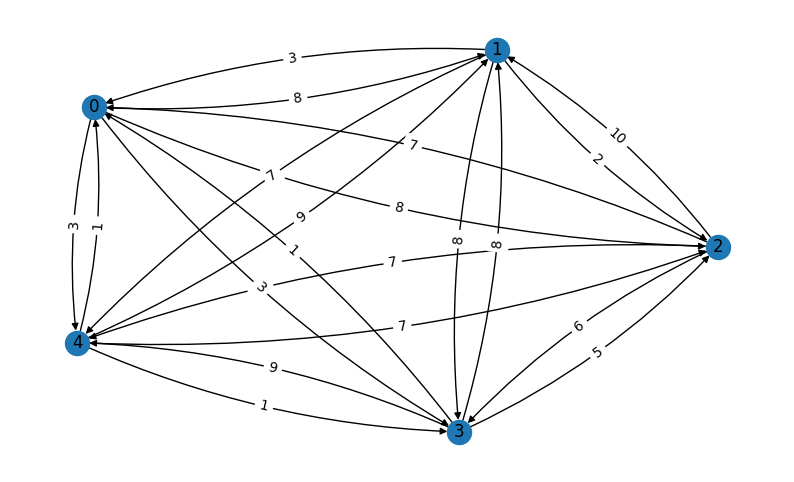

In [22]:
plt.figure(figsize=(10,6))
pos = nx.spring_layout(G2, seed=7) ## seed=7
## draw nodes
nx.draw_networkx_nodes(G2, pos, node_size = 300)
## draw node labels
nx.draw_networkx_labels(G2, pos)
## draw edges
arc_rad = 0.1
# edge_list = [(u, v) for (u, v, d) in G2.edges(data=True)]
straight_edges = [edge for edge in G2.edges() if reversed(edge) not in G2.edges()] # straight_edges = list(set(G2.edges()) - set(curved_edges))
curved_edges = [edge for edge in G2.edges() if reversed(edge) in G2.edges()]
nx.draw_networkx_edges(G2, pos, edgelist = straight_edges)
nx.draw_networkx_edges(G2, pos, edgelist = curved_edges, connectionstyle=f'arc3, rad = {arc_rad}')
# edge distance labels
edge_labels = nx.get_edge_attributes(G2, "d")
straight_edge_labels = {edge: edge_labels[edge] for edge in straight_edges}
curved_edge_labels = {edge: edge_labels[edge] for edge in curved_edges}
nx.draw_networkx_edge_labels(G2, pos, edge_labels = straight_edge_labels)
# nx.draw_networkx_edge_labels(G2, pos, edge_labels = curved_edge_labels, label_pos=0.7)
my_draw_networkx_edge_labels(G2, pos, edge_labels = curved_edge_labels, rad = arc_rad)
# nx.draw_networkx_edge_labels(G2, pos, edge_labels = edge_labels, label_pos=0.3, font_size=7)

for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

In [32]:
class Ant:
    ## global
    complete_step = None
    # __posisions = None
    alpha = 1
    beta = 1
    ## local
    start = None
    current = None
    visited = None
    num_visited = None
    tour = None
    tour_distance = None
    finished = None    
    def __init__(self, complete_step = 0, start = None): ## __complete_step = n+1
        self.finished = False
        self.tour_distance = 0
        self.complete_step = complete_step
        self.visited = set()        
        self.num_visited = 0
        self.tour = []
        self.tour_distance = 0
        if start:
            self.visit(start)
    def has_visited(self, pos):
        return pos not in self.visited
    def allow_to_visit(self, list_of_position):
        return list_of_position.difference(self.visited)
    def visit(self, pos, distance):
        ## check if this position is valid to visit
        if not self.has_visited(pos):
            return False
        # self.visited[pos] = True
        self.visited.add(pos)
        self.tour.append(pos)
        self.tour_distance += distance
        self.current = pos
        if self.current == self.start:  ## self.start init = None
            self.finished = True
        else:
            if len(self.visited) == 0:
                self.start = pos
            self.num_visited += 1
            if self.num_visited == self.complete_step:
                self.visited.discard(self.start)
        return True
    def transition_probability(self, pheromone, distance):
        pheromone = np.copy(pheromone)
        pheromone[list(self.visited)] = 0
        row = pheromone ** self.alpha * (( 1.0 / distance) ** self.beta)
        norm_row = row / row.sum
        return norm_row
    def exploitation(self, adj_edge):
        print("do nothing")
    def biased_exploration(self, adj_edge):
        # allow = self.allow_to_visit(adj_edge)
        # pheromone = [attr for target, atts in adj_edge.items()]
        pheromone = []
        distance = []
        P = self.transition_probability(pheromone, distance)



    def next_visit(self, pheromone, distance):
        P = self.transition_probability(pheromone, distance)
        pos = np.random.np_choice(self.all_inds, 1, p=P)[0]
        return pos
    def build_tour(self):
        tour = tuple([self.start] + self.visited)
        return tour, self.tour_distance
    def build_shortest_path(self, map, exploitation = False, q0 = None):
        if exploitation:
            if not q0:
                q0 = np.random.random()
        for step in range(self.complete_step):
            if exploitation:
                q = np.random.random()
                if q<=q0:
                    next = self.exploitation(map.adj[self.current])
                else:
                    next = self.biased_exploration(map.adj[self.current])
            else:
                next = self.biased_exploration(map.adj[self.current])
            self.visit(next)
        return self.tour, self.tour_distance
    def run(self, map, exploitation = False, q0 = None):
        self.build_shortest_path(self, map = map, exploitation = exploitation, q0 = q0)

In [31]:
class AntColony:
    ## global
    __num_positions = None
    __posisions = None
    __graph = None
    __alpha = 1
    __beta = 1
    __decay = 0.95
    time_out = None
    ## local
    __num_ants = None
    ants = None
    max_ant_id = 0
    distribution_style = None ## distribution_style = {'1_1' : each 1 position at least 1 ant; '1_n': each position has random ants}:
    b = None
    def __init__(self, graph, num_ants = None, distribution_style = '1_n'): 
        ##
        self.__graph = graph
        self.parse_graph()
        ##
        if num_ants and 0 < num_ants:
            self.__num_ants = num_ants
            if self.__num_ants == self.__num_positions and distribution_style == '1_1':
                self.distribution_style = '1_1'
            else:
                self.distribution_style = '1_n'
        else:
            self.__num_ants = self.__num_positions
            self.distribution_style = '1_n'
        self.ants = {}
    def get_pheromone(self, pheromone = 't'):
        # return self.__graph.get_edge_attributes(pheromone)
        return nx.get_edge_attributes(self.__graph, pheromone)
    def get_distance(self, distance = 'd'):
        # return self.__graph.get_edge_attributes(pheromone)
        return nx.get_edge_attributes(self.__graph, distance)
    def parse_graph(self):
        if self.__graph:
            self.__num_positions = self.__graph.number_of_nodes()
            self.__posisions = list(self.__graph.nodes)
    def ants_distribution(self):  
        num_positions = self.__num_positions
        posisions = self.__posisions
        num_ants = self.__num_ants
        shuffle = [pos for pos in self.__posisions.keys()]
        self.__b = {pos:[] for pos in self.__posisions.keys()}
        ## 1_1
        if self.distribution_style == '1_1':
            for pos in shuffle:
                ant = Ant(num_positions = self.__num_positions, posisions = self.__posisions, start = pos)
                ant_id = self.max_ant_id
                self.max_ant_id += 1
                self.ants[self.ant_id] = ant
                self.__b[pos].add(ant_id)
                num_ants -= 1              
        ##  1_n      
        np.random.shuffle(shuffle)
        iter = 0
        while num_ants > 0:
            if iter >= num_positions:
                np.random.shuffle(shuffle)
                iter = 0
            pos = shuffle[iter]
            num_ants_distributed = np.random.randint(0, num_ants + 1)
            while num_ants_distributed > 0:
                ant = Ant(num_positions = num_positions, posisions = posisions, start = pos)
                ant_id = self.max_ant_id
                self.max_ant_id += 1
                self.ants[self.ant_id] = ant
                self.__b[pos].add(ant_id)
                num_ants -= 1
                num_ants_distributed -= 1
    def init_spread_pheromone(self, pheromone = 't', c = 0.001):
        for e in self.__graph.edges():
            self.__graph[e[0]][e[1]][pheromone] = c
            # print(f'{e}, {graph[e[0]][e[1]]}')
    # def spread_pheromone(self)

    def spread_pheromone(self, best_tour_distance, decay = 0.95, pheromone = 't'):
        for e in self.__graph.edges():
            self.__graph[e[0]][e[1]][pheromone] += 1.0 / best_tour_distance
            self.__graph[e[0]][e[1]][pheromone] *= decay
            # print(f'{e}, {graph[e[0]][e[1]]}')s
    def run(self, n_iteration = 100):  ## distance = 'd'
        self.ants = {}
        self.ants_distribution()
        self.init_spread_pheromone(pheromone = 't', c = 0.001)
        self.all_time_shortest_path = ("", np.inf)
        ## alg
        for iter in range(n_iteration):
            ## parallel (?)
            ## find tour
            all_paths = []           
            for ant in self.ants:
                tour, tour_distance = self.ants[ant].shortest_path()
                all_paths.append((tour, tour_distance))
                best_tour_distance = sorted(all_paths, key=lambda x: x[1])[0][1]
            ## spread pheromone
            self.spread_pheromone(best_tour_distance = best_tour_distance, pheromone = 't')
            shortest_path = min(all_paths, key=lambda x: x[1])
            print(shortest_path)
            if shortest_path[1] == self.all_time_shortest_path[1]:
                break
            if shortest_path[1] < self.all_time_shortest_path[1]:
                self.all_time_shortest_path = shortest_path
        return self.all_time_shortest_path   
    def ASC(self, n_iteration = 100, num_ants = 10):
        ## init
        self.ants = {}
        self.ants_distribution()
        self.init_spread_pheromone(pheromone = 't', c = 0.001)
        self.all_time_shortest_path = ("", np.inf)
        ## 

In [30]:
G = G1
ac = AntColony( graph = G, num_ants = 10)
ac.run(n_iteration = 100)



# G.adj['0']['1']['d']

# ac = AntColony()

AttributeError: 'list' object has no attribute 'keys'

In [ ]:
# from multithread import MultipleThreading